In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, datasets
from tensorflow.keras.layers import Dense, Flatten

In [3]:
(X_train,y_train),(X_test,y_test) = datasets.mnist.load_data()
X_train[0]

11490434/11490434 [==============================] - 0s 0us/step


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

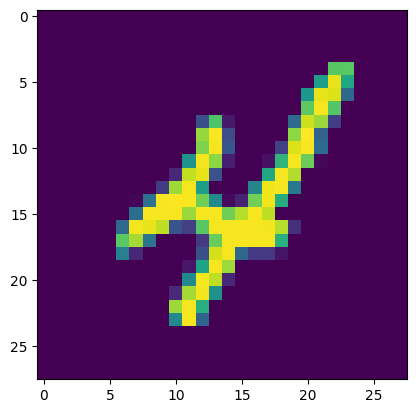

In [6]:
import matplotlib.pyplot as plt
plt.imshow(X_train[9])

In [8]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
classes[y_train[9]]

'deer'

In [9]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255
X_test_scaled[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [13]:
model = Sequential()
model.add(Flatten(input_shape =(28,28)))
model.add(Dense(1000,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [14]:
model.compile(loss= 'sparse_categorical_crossentropy',optimizer ='SGD', metrics = ['accuracy'])

In [15]:
history = model.fit(X_train_scaled, y_train, epochs = 20,validation_split = 0.2)

Epoch 1/20
1500/1500 [==============================] - 7s 3ms/step - loss: 0.5894 - accuracy: 0.8518 - val_loss: 0.3006 - val_accuracy: 0.9172
Epoch 2/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2818 - accuracy: 0.9207 - val_loss: 0.2394 - val_accuracy: 0.9322
Epoch 3/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2294 - accuracy: 0.9359 - val_loss: 0.2020 - val_accuracy: 0.9447
Epoch 4/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1958 - accuracy: 0.9445 - val_loss: 0.1770 - val_accuracy: 0.9505
Epoch 5/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1702 - accuracy: 0.9510 - val_loss: 0.1590 - val_accuracy: 0.9556
Epoch 6/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.1500 - accuracy: 0.9577 - val_loss: 0.1465 - val_accuracy: 0.9590
Epoch 7/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.1334 - accuracy: 0.9616 - val_loss: 0.1366 - val_accuracy:

In [21]:
y_prob = model.predict(X_test)
y_pred = y_prob.argmax(axis = 1)


313/313 [==============================] - 1s 3ms/step


In [22]:
from sklearn.metrics import accuracy_score
ac = accuracy_score(y_test,y_pred)
print('accuracy=',ac)

accuracy= 0.9717


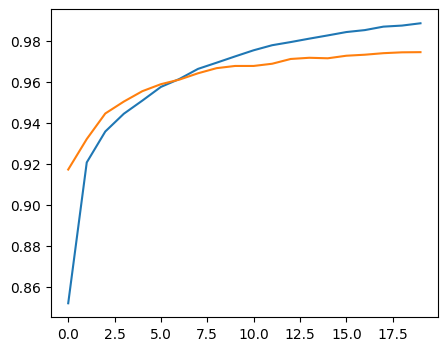

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,4))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

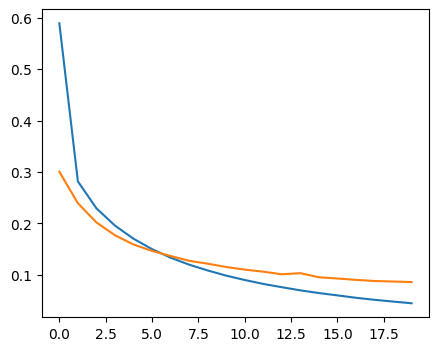

In [27]:
plt.figure(figsize=(5,4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()